In [1]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# CSV directory = same folder as this notebook
# Works on Windows, Linux, Mac
csv_dir = Path('.')

print(f"CSV Directory: {csv_dir.resolve()}")

CSV Directory: /mnt/windows_d/Gauravs-Files-and-Folders/Freelance/Codebasics/Job_Scrapper/data/Analysis_Report


In [3]:
# Function to create visualization for each CSV
def visualize_skills(csv_path, top_n=20):
    # Extract job title from filename (remove .csv extension)
    job_title = csv_path.stem.replace('_', ' ')
    
    # Read CSV
    df = pd.read_csv(csv_path)
    
    # Take top N skills
    df_top = df.head(top_n).copy()
    
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Bar chart - Count
    sns.barplot(data=df_top, y='Skill', x='Count', ax=ax1, palette='viridis', hue='Skill', legend=False)
    ax1.set_title(f'{job_title} - Top {top_n} Skills by Count', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Count', fontsize=12)
    ax1.set_ylabel('Skill', fontsize=12)
    
    # Bar chart - Percentage
    # Remove % sign and convert to float
    df_top['Percentage_val'] = df_top['Percentage'].str.rstrip('%').astype(float)
    sns.barplot(data=df_top, y='Skill', x='Percentage_val', ax=ax2, palette='mako', hue='Skill', legend=False)
    ax2.set_title(f'{job_title} - Top {top_n} Skills by Percentage', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Percentage (%)', fontsize=12)
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary stats
    print(f"\n{job_title} Summary:")
    print(f"  Total skills: {len(df)}")
    print(f"  Top skill: {df.iloc[0]['Skill']} ({df.iloc[0]['Percentage']})")
    print(f"  Skills above 50%: {len(df[df['Percentage'].str.rstrip('%').astype(float) > 50])}")
    print("-" * 80)

## Data Analyst

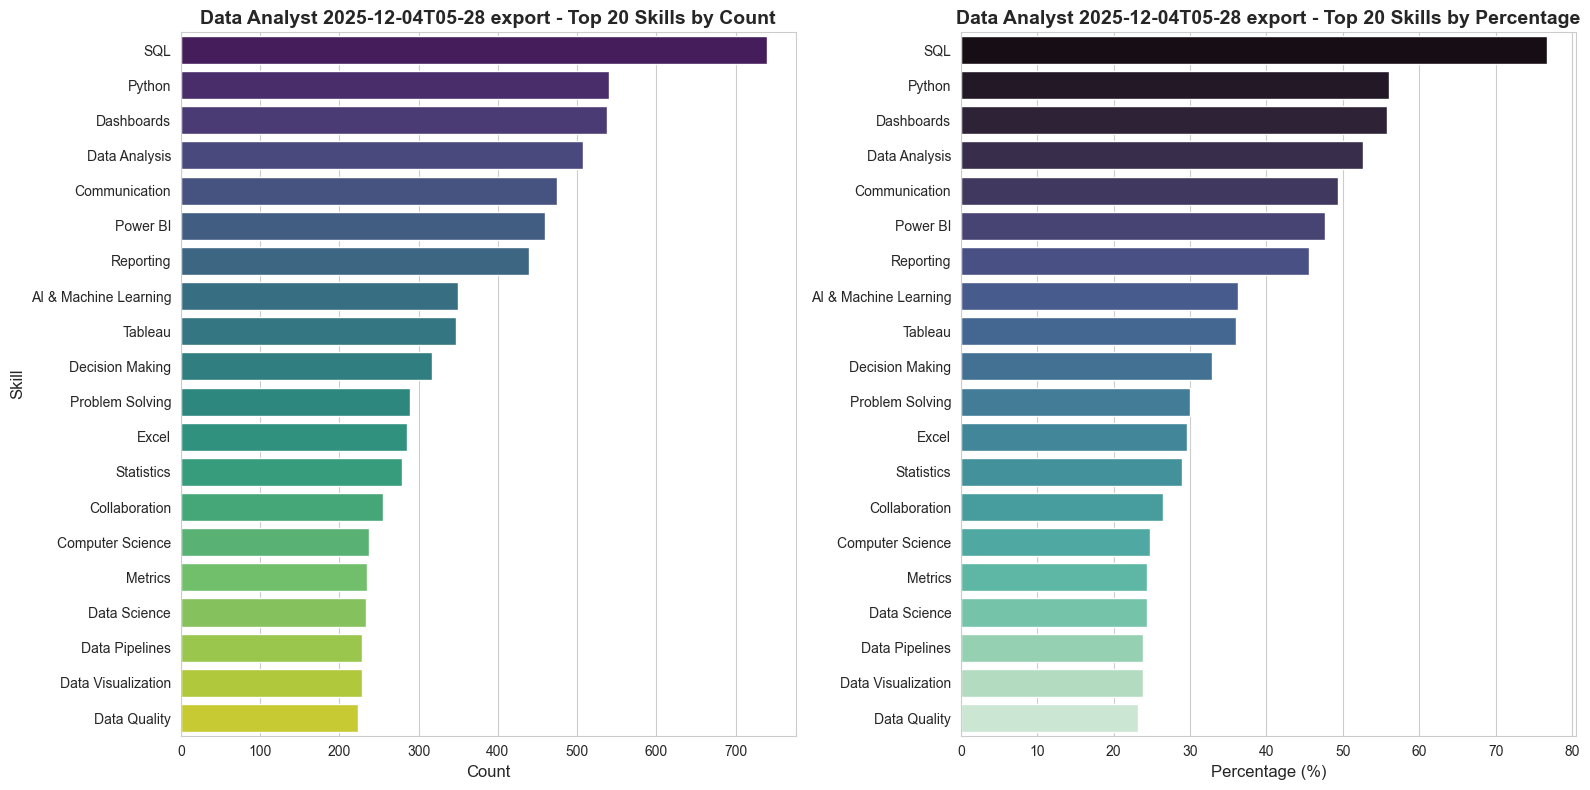


Data Analyst 2025-12-04T05-28 export Summary:
  Total skills: 30
  Top skill: SQL (76.7%)
  Skills above 50%: 4
--------------------------------------------------------------------------------


In [4]:
visualize_skills(csv_dir / 'Data_Analyst/Data_Analyst_2025-12-04T05-28_export.csv')

## Data Engineer

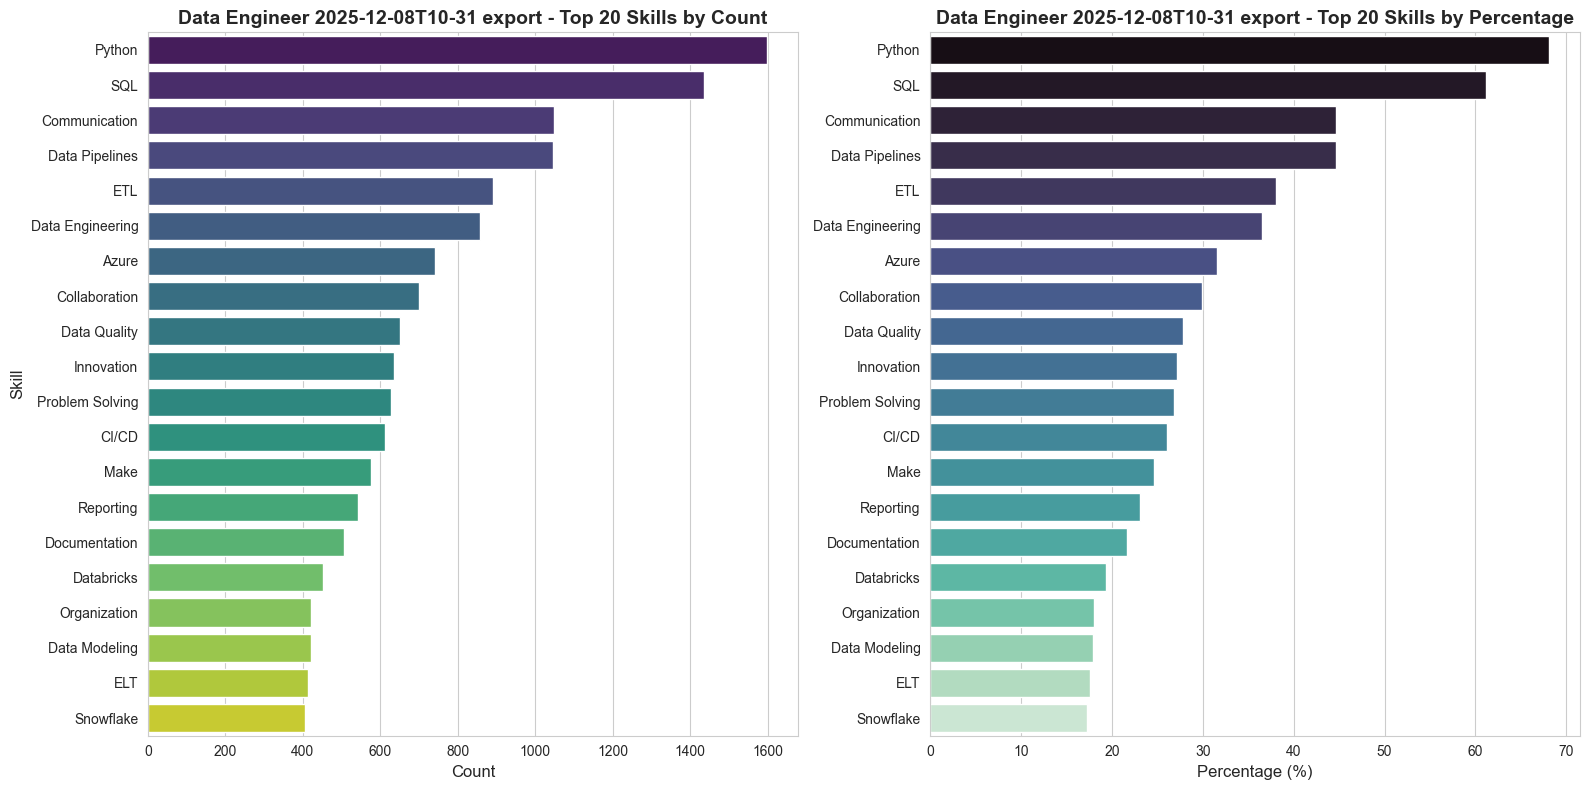


Data Engineer 2025-12-08T10-31 export Summary:
  Total skills: 50
  Top skill: Python (68.1%)
  Skills above 50%: 2
--------------------------------------------------------------------------------


In [5]:
visualize_skills(csv_dir / 'Data_Engineer/Data_Engineer_2025-12-08T10-31_export.csv')

## AI Engineer

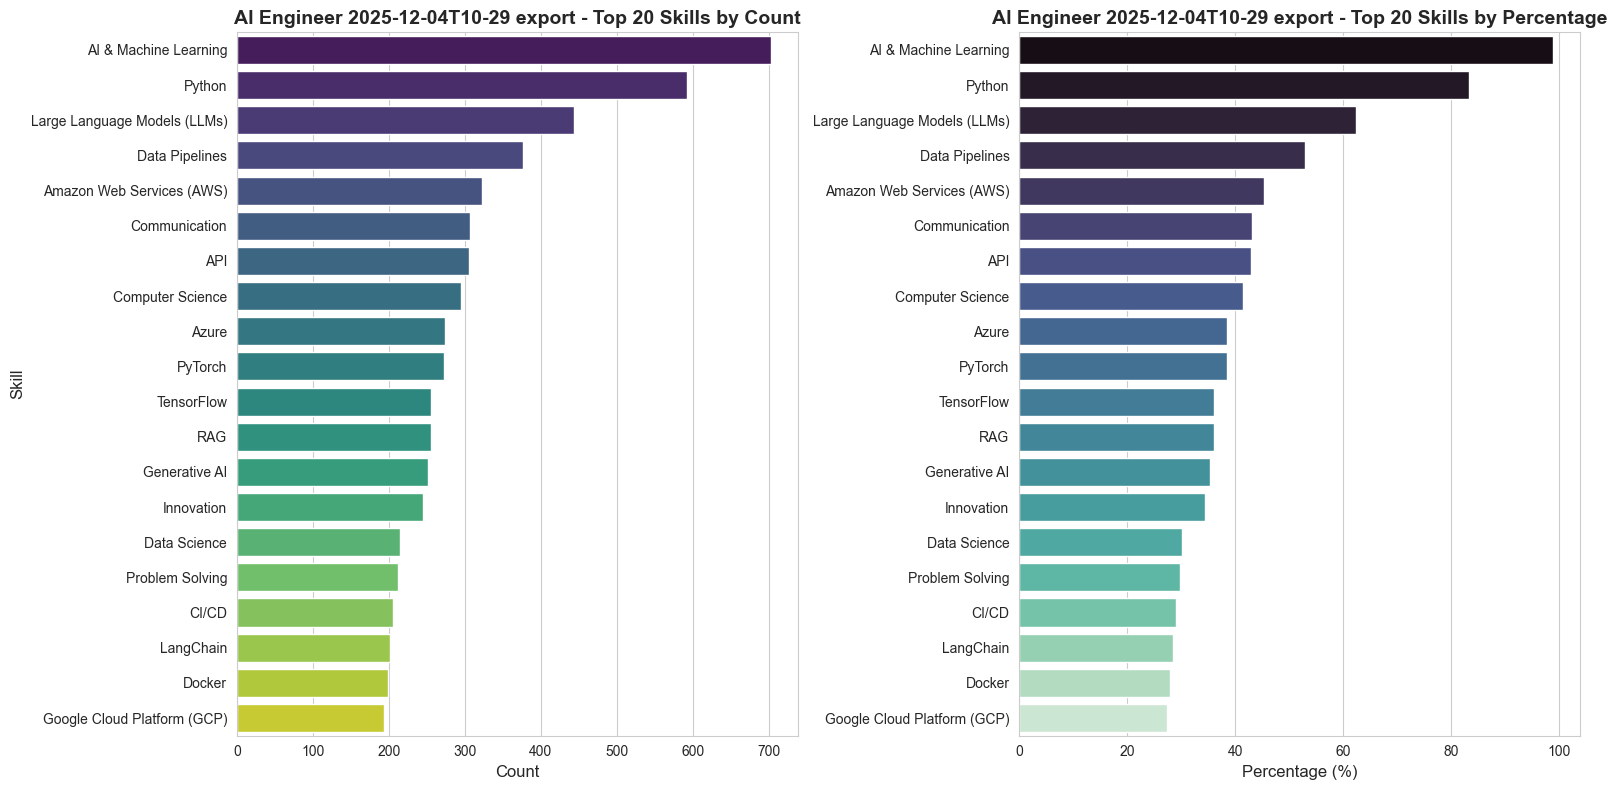


AI Engineer 2025-12-04T10-29 export Summary:
  Total skills: 50
  Top skill: AI & Machine Learning (98.9%)
  Skills above 50%: 4
--------------------------------------------------------------------------------


In [6]:
visualize_skills(csv_dir / 'GenAI_DataScience/AI_Engineer_2025-12-04T10-29_export.csv')